In [20]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt

In [31]:
red_wine = pd.read_csv("input/kaggle/red-wine-quality/winequality-red.csv")

In [32]:
# create train and validation split
df_train = red_wine.sample(frac=0.7, random_state = 0)

In [33]:
df_valid = red_wine.drop(df_train.index)

In [34]:
# time to normalize! 
# example scales from 0-1, let's start with that, then play around with other normalizing techniques - note, this scales the labels as well

In [35]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [36]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/home/devcontainers/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=100,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 0.3527 - val_loss: 0.1441
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1399 - val_loss: 0.1288
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1259 - val_loss: 0.1149
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1163 - val_loss: 0.1076
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1114 - val_loss: 0.1140
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1132 - val_loss: 0.1052
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1094 - val_loss: 0.1095
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1079 - val_loss: 0.1006
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1024 - val_loss: 0.1009
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1000 - val_loss: 0.1028


<Axes: title={'center': 'First test using label normalization and 0-1 min max scaling'}>

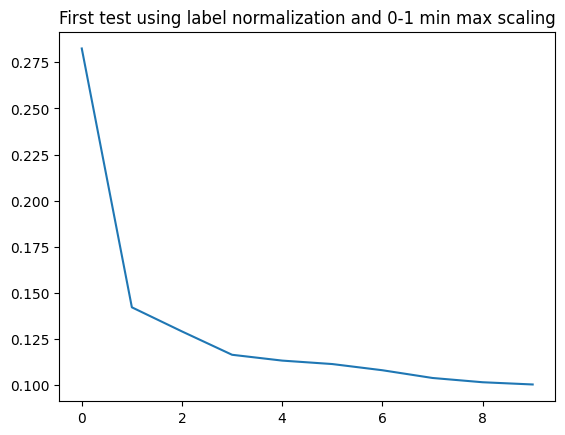

In [39]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(title= "First test using label normalization and 0-1 min max scaling")

In [ ]:
history.

,loss,val_loss
0,0.308641,0.137873
1,0.138914,0.131714
2,0.128937,0.119644
3,0.120589,0.111823
4,0.114150,0.110589
5,0.109705,0.105377
6,0.106527,0.108295
7,0.103993,0.104190
8,0.105721,0.107847
9,0.103345,0.101578


Experiment 2: use scikit learn normalizer

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
# Load the data
red_wine = pd.read_csv("input/kaggle/red-wine-quality/winequality-red.csv")

# Train/validation split
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train_raw = df_train.drop(columns="quality")
X_valid_raw = df_valid.drop(columns="quality")
y_train = df_train["quality"]
y_valid = df_valid["quality"]

# Scale using training data only
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid_raw), columns=X_valid_raw.columns)

In [51]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03,1.119000e+03
mean,4.571857e-16,-1.460454e-16,1.158839e-16,-2.301803e-17,-1.111215e-16,5.079841e-17,6.032311e-17,5.282241e-15,1.980344e-15,6.826036e-17,-4.762351e-16
std,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00,1.000447e+00
min,-2.107923e+00,-2.339440e+00,-1.388335e+00,-1.261661e+00,-1.199019e+00,-1.453469e+00,-1.222356e+00,-3.553267e+00,-2.882291e+00,-2.078583e+00,-1.882667e+00
25%,-6.832378e-01,-7.283949e-01,-9.251737e-01,-4.777638e-01,-3.604834e-01,-8.573787e-01,-7.362538e-01,-6.112664e-01,-6.774566e-01,-6.759197e-01,-8.654416e-01
50%,-2.273385e-01,-3.794688e-02,-1.017751e-01,-2.425947e-01,-1.791784e-01,-1.619404e-01,-2.501512e-01,2.714236e-02,3.587216e-02,-2.296178e-01,-2.181165e-01
75%,5.134978e-01,6.093482e-01,8.245484e-01,7.096403e-02,9.277907e-02,5.334978e-01,4.790028e-01,5.777699e-01,6.195048e-01,4.717137e-01,6.141586e-01
max,4.331654e+00,6.061011e+00,2.677195e+00,8.928999e+00,1.187760e+01,5.600262e+00,7.375584e+00,3.431989e+00,3.797060e+00,8.441390e+00,4.128209e+00


In [52]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=100,
)



Epoch 1/100


/home/devcontainers/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-30 15:23:54.671368: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_354', 276 bytes spill stores, 276 bytes spill loads

2025-04-30 15:23:54.788532: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_157', 484 bytes spill stores, 484 bytes spill loads

2025-04-30 15:23:54.920894: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local mem

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.2601

2025-04-30 15:23:56.689271: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 152 bytes spill stores, 152 bytes spill loads

2025-04-30 15:23:56.925764: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25_0', 1148 bytes spill stores, 1872 bytes spill loads

2025-04-30 15:23:56.961396: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 484 bytes spill stores, 484 bytes spill loads

2025-04-30 15:23:57.004069: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25_0', 1464 bytes spill stores, 1156 bytes spill loads



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 4.1607 - val_loss: 2.0221
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6742 - val_loss: 1.3229
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2620 - val_loss: 1.2442
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1516 - val_loss: 1.1222
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0484 - val_loss: 1.1036
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9970 - val_loss: 0.9509
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8994 - val_loss: 0.8741
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8631 - val_loss: 0.8384
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7964 - val_loss: 0.7728
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7404 - val_loss: 0.7163
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6775 - val_loss: 0.7121
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6179 - val_loss: 0.6621
Epoch 13/10

<Axes: title={'center': 'First test using sci-kit learn normalization'}>

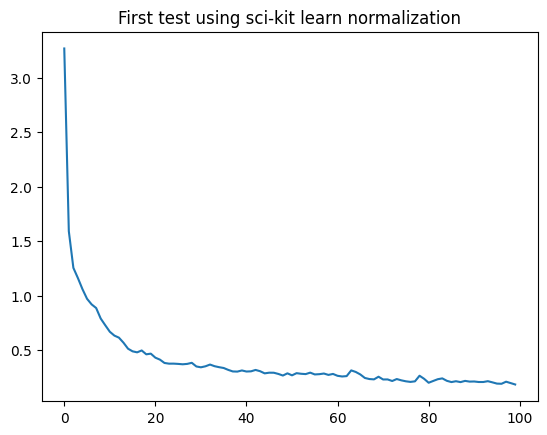

In [53]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(title= "First test using sci-kit learn normalization")

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1),
    ])
    model.compile(
        optimizer='adam',
        loss='mse',
    )
    return model


In [44]:
with open("logs/model_summary.txt", "w") as f:
    model.summary(print_fn=lambda x: f.write(x + "\n"))

In [45]:
histories = []
model_names = []